In [1]:
# Dl framework - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [3]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(250,250,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(250*250*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 96)        34944     
                                                                 
 activation (Activation)     (None, 60, 60, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 20, 20, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                    

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(250,250),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Validation',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 299 images belonging to 2 classes.


Found 62 images belonging to 2 classes.


In [6]:
img_dims = 150
epochs = 20
batch_size = 32

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

In [7]:
history = model.fit(
    training_set, steps_per_epoch=training_set.samples // batch_size, 
    epochs=epochs, 
    validation_data=test_set, validation_steps=test_set.samples // batch_size,
    callbacks=[reduce_lr])

Epoch 1/20
9/9 [==============================] - 28s 2s/step - loss: 0.8693 - accuracy: 0.5094 - val_loss: 0.6944 - val_accuracy: 0.3750
Epoch 2/20
9/9 [==============================] - 19s 2s/step - loss: 0.6943 - accuracy: 0.4869 - val_loss: 0.6913 - val_accuracy: 0.5625
Epoch 3/20
9/9 [==============================] - 19s 2s/step - loss: 0.6935 - accuracy: 0.4682 - val_loss: 0.6925 - val_accuracy: 0.5312
Epoch 4/20
9/9 [==============================] - 19s 2s/step - loss: 0.6942 - accuracy: 0.4944 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/20
9/9 [==============================] - 30s 4s/step - loss: 0.6949 - accuracy: 0.4794 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 6/20
9/9 [==============================] - 24s 3s/step - loss: 0.6954 - accuracy: 0.4906 - val_loss: 0.6878 - val_accuracy: 0.5625
Epoch 7/20
9/9 [==============================] - 22s 2s/step - loss: 0.6953 - accuracy: 0.4831 - val_loss: 0.6917 - val_accuracy: 0.5312
Epoch 8/20
9/9 [==================

In [8]:
import matplotlib.pyplot as plt

In [9]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

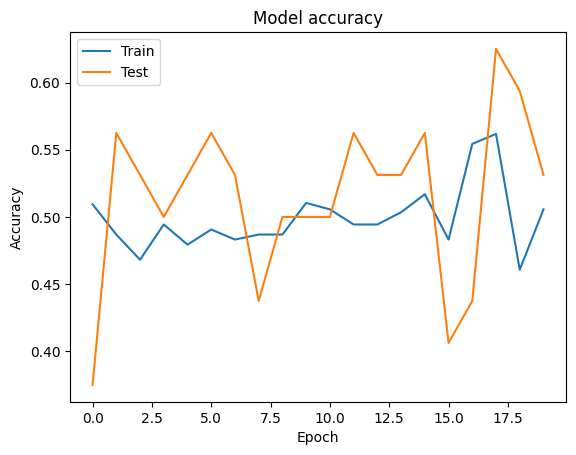

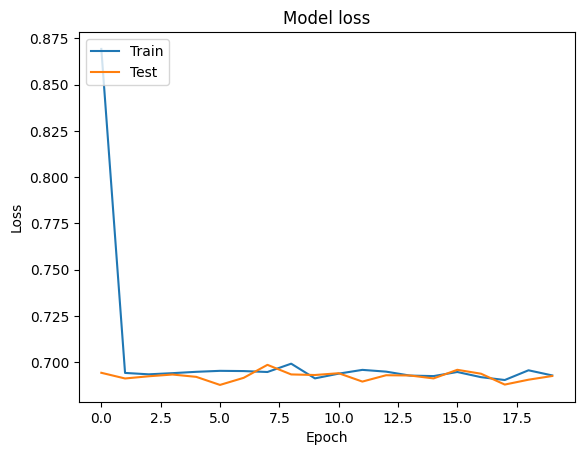

In [10]:
graph()

In [11]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2/2 [==============================] - 5s 3s/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 50.0


In [13]:
import numpy as np

               precision    recall  f1-score   support

    Defective       0.50      1.00      0.67        31
Non defective       0.00      0.00      0.00        31

     accuracy                           0.50        62
    macro avg       0.25      0.50      0.33        62
 weighted avg       0.25      0.50      0.33        62



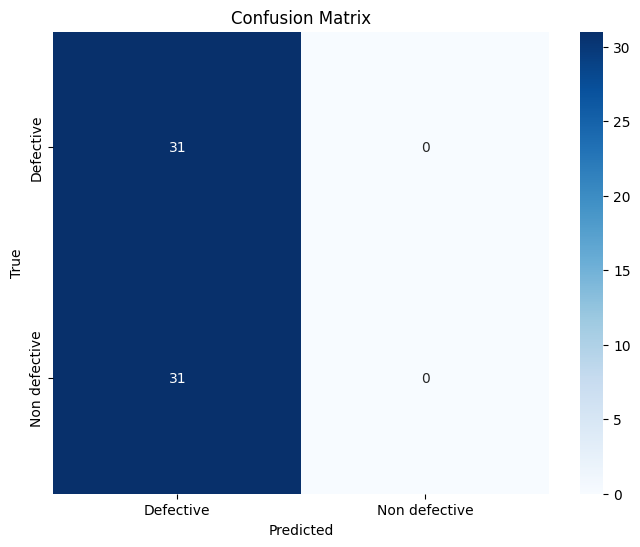

In [14]:
# Evaluate the model on the test set
test_set.reset()
y_true = test_set.classes
y_pred = np.argmax(model.predict_generator(test_set, steps=len(test_set)), axis=1)

# Print classification report
class_names = list(test_set.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)

In [6]:
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output_m2.png') # write to disk
visualkeras.layered_view(model, to_file='output_m2.png').show() # write and show

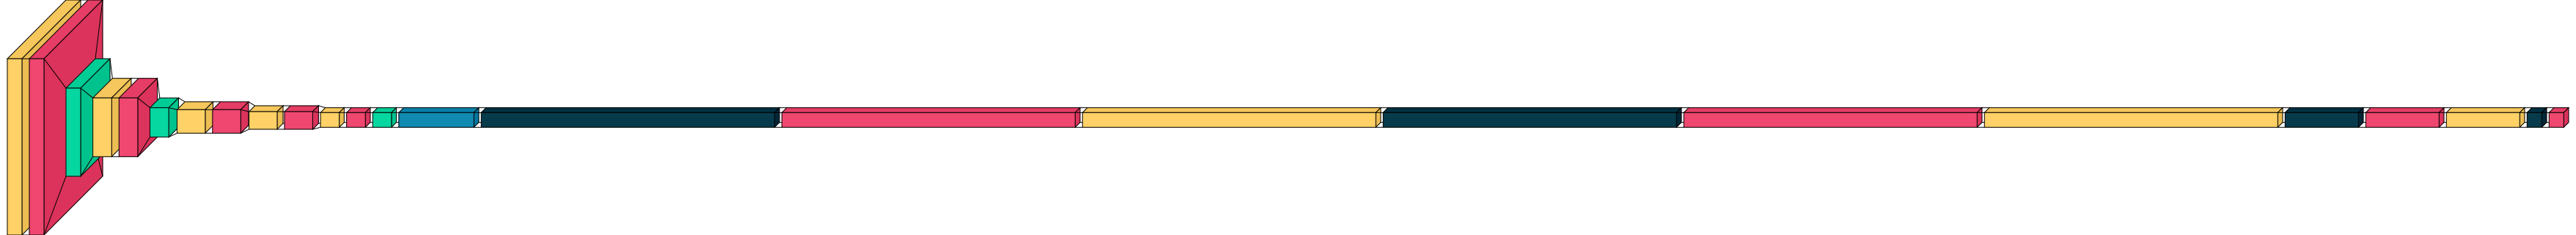

In [7]:
visualkeras.layered_view(model)